# Semana 9

## Iterables

Un iterable es un objeto que puede ser recorrido, es decir, que se puede recorrer elemento por elemento. Los iterables son objetos que implementan el método `__iter__` o `__getitem__`.

Conceptos claves **iterable e iterador**

Un **iterable** es cualquier **objeto por el cual se puede iterar**, es decir, se pueden recorrer los elementos que este contiene mediante el uso de for.

(`for i in iterable:`)

Un **iterable** siempre tiene implementrado el método `__iter__` o `__getitem__`. No es necesario que sea indexable.

Por otro lado, un **iterador** es un objeto que **itera sobre un iterable** el objeto retornado por el método `__iter__` de un iterable es un iterador.
Este objeto iterador implementa el método `__next__` que retorna el siguiente elemento del iterable. Cuando no quedan más elementos por recorrer, el método `__next__` lanza una excepción `StopIteration`.

**Más adelante vamnos a ver que son las Exceptions**

```python 
# iter(conjunto) nos entrega un objeto que itera sobre ese conjunto
conjunto = {1, 3, 4, 6}
iterador = iter(conjunto)  # Esto es lo mismo que conjunto.__iter__()
print(type(iterador))

# Ahora vamos a invocar a next para que el iterador nos entregue
# el siguiente valor del iterable
print(next(iterador))      # Esto es lo mismo que iterador.__next__()
print(next(iterador))
print(next(iterador))

'''
<class 'set_iterator'>
1
3
4
'''
```

Si le pedimos más de lo que tienen levantará una excepción del tipo StopIteration.

En resumen:

* Un iterale se puede utilizar/recorrer multiples veces; en cambio un **iterador** solo puede utilizarse una única vez.

* Esto se debe a que un iterable tiene el método `__iter__` que nos entrega un iterador, y este **siempre** retorna un iterador.

Por su parte el **iterador** es un obejeto que tiene el método next, objeto entregado por iter, el cual es agotable, es decir, una vez que se recorre todo el iterador, este ya no puede ser utilizado.

## Forma básica de hacer una estructura iterable

Creamos la clase **iteradora e iterable**. 

* Cabe destacxar que hay más formas de hacer que una estructura sea iterable sin crean una nueva clase, pero esta es la más básica.

```python
from __future__ import annotations 

class IterableListaNumeros:
    '''
    Aqui la clase iterable
    Implementa el metodo __iter__
    El cual retorna el iterador (objeto)
    '''

    def __init__(self, objeto: list) -> None:
        self.objeto = objeto
    
    def __iter__(self) -> IteradorListaNumeros:
        return IteradorListaNumeros(self.objeto)

```

Ahora falta implementar el IteradorListaNummeros

Este debe tener:

* El método __next__ que retorna los valors hasta que el iterador se queda sin elementos.

* El metodo __iter__ que retorna una refrencia a la instacia de iterador (self) **No a la clase**

**nota:** Es posible no implementar el método __iter__ en el iterador, pero no será pósble obtener el iteradopr de forma manual (`iterador = iter(iterador)`) y luego usar el iterador directamente en el `for`

**en general los iteradores no se pueden reiniciar**

```python 
from typing import Self


class IteradorListaNumeros:
    def __init__(self, iterable: list) -> None:
        # Hacemos una copia del iterable para no afectar los valores originales
        self.iterable = iterable.copy()
    
    def __iter__(self) -> Self: 
        return self
    
    def __next__(self) -> int:
        if not self.iterable:
            # Levantamos una excepción del tipo StopIteration
            # con el mensaje "Llegamos al final".
            raise StopIteration("Llegamos al final")
        else:
            valor = self.iterable.pop(0)
            return valor

datos = [1, 2, 3, 4, 5]
iterable = IterableListaNumeros(datos)
for i in iterable:
    print(i, end=" ")

'''
1 2 3 4 5
'''
```

Esto se puede hace rtodas las veces que se quiera con el iterable:

```python
for i in iterable:
    print(i, end=" ")

'''
1 2 3 4 5
'''
```

En cambio si usamos directanenbte el iterador funcionara solo una vez.

```python
iterador = IteradorListaNumeros(datos)
# Primer intento
for i in iterador:
    print(i, end=" ")
    
# Segundo intento con el mismo iterador
for i in iterador:
    print(i, end=" ")

'''
1 2 3 4 5
Traceback (most recent call last):
  File "main.py", line 23, in <module>
    for i in iterador:
  File "main.py", line 13, in __next__
    raise StopIteration("Llegamos al final")
StopIteration: Llegamos al final
'''
```

La ventaja de que un iterador se puede recorrer una sola vez es que se puede interrumpir su recorrido en cualquier momento y no se pierde la posición en la que se quedó.

```python
iterable = IterableListaNumeros(datos)

iterador = iter(iterable)
for i in iterador:
    print(i, end=" ")
    if i >= 3:
        break

'''
1 2 3
'''

for i in iterador:
    print(i, end=" ")

'''
4 5
'''
```

Para comenzar denuevo debemos usar otro iterador. Como en el caso anterior usamos el iterable, para luego crear un iterador de este, que como tiene el metodo __iter__ podemos usarlo en el for. Luego para usar nuevamente el iterable, simplemente sacamos un nuevo iterador o lo recorremos directamente.

Cada iterador tiene su propia **memoria** de donde se quedó y no se afecta por los otros iteradores. Es decir no depoende del iterable.

## Iteradores personalizados

Podemos definir como queremos que se recorra el iterable, editando la clase iterador.

```python
from typing import Self


class IteradorListaNumerosOriginal:
    def __init__(self, iterable: list) -> None:
        self.iterable = iterable.copy()

    def __iter__(self) -> Self: 
        return self

    def __next__(self) -> int:
        if not self.iterable:
            raise StopIteration("Llegamos al final")
        else:
            valor = self.iterable.pop(0)
            return valor

datos = [5, 1, 3, 2, 4]
iterable = IteradorListaNumerosOriginal(datos)
for i in iter(iterable):
    print(i, end=" ")

'''
5 1 3 2 4
'''
```

En cambio si editamos el iterador para que se recorra de manera ordenada.

```python
from typing import Self


class IteradorListaNumerosOrdenada:
    def __init__(self, iterable: list) -> None:
        self.iterable = iterable.copy()

    def __iter__(self) -> Self:
        # Ordenamos los elementos del iterable antes de empezar a recorrerlos
        self.iterable.sort()
        return self

    def __next__(self) -> int:
        if not self.iterable:
            raise StopIteration("Llegamos al final")
        else:
            valor = self.iterable.pop(0)
            return valor


iterable = IteradorListaNumerosOrdenada(datos)
for i in iter(iterable):
    print(i, end=" ")

'''
1 2 3 4 5
'''
```

## Generadores

Los generadors son un caso especial de los **iteradores**. Los generadores nos permiten iterar sobre secuenncia de datos sin la necesidad de almacenarlos en alguna estructura especial. Una vez que terminamos de iterar sobre un generador, el generador desaparece. Esto es muy utili para realizar calculos sobre secuencias de nbumeros que solos nos sirven para ese calculo en particular.

Los generadores se crean con ()

```python
# Por el sólo hecho de usar paréntesis estamos creando un generador.
generador_pares = (2 * i for i in range(10))
print(type(generador_pares))

'''
<class 'generator'>
'''
```

Para ver el porque de la convencia de usar generadores, vemos su impacto en memoria.

```python
from sys import getsizeof

generador_pares = (2 * i for i in range(10 ** 6))
lista_pares = [2 * i for i in range(10 ** 6)]

print("Bytes del generador:", getsizeof(generador_pares))
print("Bytes de la lista:", getsizeof(lista_pares))

'''
Bytes del generador: 208
Bytes de la lista: 8448728
'''
```

Esta ventaja en memoria se produce ya que **generan** cada nuevo elementro de la secuencia cuando se le solicita y no mantienen toods los elementos de la secuencia en memoria.

Un ejemplo sería, tenemos un archivo de 1GB de memoria, usar `archivo.readlines()` nos devolverá una lista con todas las lineas del archivo, lo que ocupará 1GB de memoria. En cambio si lemos una linea a la vez usando un  gfenerador se usaría muchiiiisimo menos memoria.

## Funciones Generadoras

Las funciones en python tambien pueden funcionar como generadores, con la sentencia `yield`. análogo a return pero con difrencias.

`yield` se encarga de retornar el valor inidicado, se asegura que en la proxima llamada se parta de donde se dejo

Estamos trabajando con uan funcion que una vez que entrega un valor a traveés de yield, esta cediendo control de manera temproal, asumiendo que será utilizada nuevam,ente para generar más valores.

Funcion generadora de numeros decrecientes.

```python
from typing import Generator

def conteo_decreciente(n) -> Generator:
    print(f"Contando en forma decreciente desde {n}")
    while n > 0:
        yield n
        n -= 1

x = conteo_decreciente(10) # No retorna nada ya que ahora es un generador
print(type(x))

'''
<class 'generator'>
'''

for number in x:
    print(number)

'''
Contando en forma decreciente desde 10
10
9
8
7
6
5
4
3
2
1
'''
x = conteo_decreciente(5)
print(next(x))

'''
Contando en forma decreciente desde 5
5
'''
```


Un ejemplo de la funcion generadora de nbumeros de fibonacci:

```python
from typing import Generator


def fibonacci() -> Generator:
    a, b = 0, 1
    while True: # Notar que este generador nunca "se agota"
        yield b
        a, b = b, a + b


generador_fibonacci = fibonacci()

# Imprimimos los primeros 5 elementos
for i in range(5):
    print(next(generador_fibonacci))

''' 
1
1
2
3
5
'''
```

Ejemplo con otras colleciones, como listas.

```python
from typing import Generator


def maximo_acumulativo(valores) -> Generator:
    """Retorna el máximo visto hasta ahora en una colección de valores."""
    max_ = float('-inf')
    for valor in valores:
        max_ = max(valor, max_)
        yield max_


lista = [1, 10, 14, 7, 9, 12, 19, 33]

for i in maximo_acumulativo(lista):
    print(i)

'''
1
10
14
14
14
14
19
33
'''
```

## Otra forma de hacer un iterable una estructura propia

Podemos implemetar la funcion generadora en la misma definicon de nuestro __iter__ en nuestra funcnion iterable

```python
from typing import Generator


class IterableListaNumeros:
    def __init__(self, objeto: list) -> None:
        self.objeto = objeto.copy()
    
    def __iter__(self) -> Generator:
        while self.objeto:
            yield self.objeto.pop(0)

datos = [1, 2, 3, 4, 5]
iterable = IterableListaNumeros(datos)

for x in iterable:
    print(x, end=" ")

'''
1 2 3 4 5
'''
```

## Interactuar con la función generadora enviuando mensajes

Podemos interactuar con la función generadora enviando mensajes a través del método `send`. Este permite enviar un valor hacia el generador, por lo que `yield`lo recibirá. Esto sirme por ejemplo al asignar una varibale `v = yiel value` guardara en la variable v el valor enviado con `send`.

**A tener encuenta**: Solo podemos usar el send cuando ya agotemos el next, ya que el send parte desde el ultimo yield.

```python
from typing import Generator


def funcion_generadora_send() -> Generator:
    contador = 0

    while True:
        valor_recibido = yield contador # tenemos que agotar el next para poder usar el send
        print("Hemos recibido {}".format(valor_recibido))

        if valor_recibido is None:  # Consideraremos 0 si nos llega un None
            valor_recibido = 0

        print("Sumaremos {} a nuestro contador".format(valor_recibido))
        contador += valor_recibido  # Sumamos el valor recibido al contador que llevamos

next(generador_send)

'''
0
'''

generador_send.send(5)

'''
Hemos recibido 5
Sumaremos 5 a nuestro contador
5
'''

# al usar next, es equivalente a hacer send de None

next(generador_send)

'''
Hemos recibido None
Sumaremos 0 a nuestro contador
5
'''

generador_send.send(10)

'''
Hemos recibido 10
Sumaremos 10 a nuestro contador
15
'''
```






Hay estructuras no lo suficientemente complejas entregadas por pyht0n para representar lo que queremos representar.

Vamos a aprender clas basesnpara representar agrupaciones de datos y relaciones entre estos

## Nodo

Corresponde a la base de las estructuras de datos. Un **nodo** es una unidad indivisible que contiene **Datos** que podemos identificar a través de un atributo llave (key). Cada nodo mantiene 0 o más referencias con **otros nodos**
A los que llamremos **nodos vecinos**, con,los que mantiene una relación.

Un conjunto, de nodos, dado que se relacionan entre sí, nos permiten definir estructuras de datos más cimplejhas y expresivas para representar información.

## Listas Ligadas

Es una estructura que **almacena nodos en orden secuencial** ( es decir como las listas, stacks, colas) en que nodo posee refrencia a un **único nodo sucesor** (next node). El primer nodo de una  lista ligada es el denominado **cabeza** (head) y el últimno que **no posee sucesor**, es la **cola** (tail)

Para modelar un nodo de una lista ligada utilizaremos una clase `Nodo` que tendrá como atributos un valor almacenado en el nodo (`valor`) y una referencia al siguiente nodo (`siguiente`, también llamado `next`). Para el caso del nodo cola, su atributo `siguiente`sera `None`. 

**Es util imaginarlo como un domino, donde cada ficha tiene un valor y una referencia a la siguiente ficha, hasta el ultimo que no la tiene**

```python
from typing import Any


class Nodo:
    """
    Esta clase representa un nodo de una lista ligada
    """
    
    def __init__(self, valor: Any = None) -> None:
        """
        Inicializa la estructura del nodo
        """
        self.valor = valor
        self.siguiente = None  # Al crear un nodo, 
                               # la referencia al siguiente nodo comienza vacía

    def __repr__(self) -> str:
        return f"Nodo[{self.valor}]"

class ListaLigada:
    """
    Clase que representa una lista ligada
    """

    def __init__(self) -> None:
        """
        Inicializa una lista ligada vacía,
        con una referencia nula a su cabeza y cola
        """
        self.cabeza = None
        self.cola = None

    def agregar(self, valor: Any) -> None:
        """
        Agrega un nuevo nodo al final de la lista
        Simnilar a append de list
        """
        # Inicializamos el nuevo nodo
        nuevo_nodo = Nodo(valor)

        # Si la lista esta vacía (no hay cabeza)
        if self.cabeza is None:
            # El nuevo nodo es la cabeza y cola de la lista
            self.cabeza = nuevo_nodo
            self.cola = nuevo_nodo
        else:
            # Agregamos el nuevo nodo como sucesor del nodo cola actual
            self.cola.siguiente = nuevo_nodo
            # Actualizamos la refrencia al nodo cola
            self.cola = nuevo_nodo

    def obtener(self, posicion: int) -> Any:
        """
        Busca el valor del nodo que está en la posición indicada,
        partiendo de 0
        """
        # Empezamos en la cabeza
        nodo_actual = self.cabeza

        # Recorremos secuencialmente la lista ligada siguiendo los punteros
        # al nodo siguiente
        for _ in range(posicion):
            # Revisamos que no se haya llegado al final de la lista
            if nodo_actual is not None:
                nodo_actual = nodo_actual.siguiente

        # Si buscamos una posición mayor a la longitud de la lista ligada
        if nodo_actual is None:
            return None
        return nodo_actual.valor 

    def insertar(self, valor: Any, posicion: int) -> None:
        """
        Inserta un nuevo nodo en la posición indicada
        """
        # Inicializamos el nuevo nodo
        nodo_nuevo = Nodo(valor)
        # Empezamos en la cabeza
        nodo_actual = self.cabeza

        # caso particular: insertar en la cabeza

        if posicion == 0:
            # Actualizamos cabeza
            nodo_nuevo.siguiente = nodo_actual
            self.cabeza = nodo_nuevo
            # Caso más particular. Si la lista estaba vacía,
            # actualizamos la cola
            if nodo_nuevo.siguiente is None:
                self.cola = nodo_nuevo
            return
    
        # Buscamos el nodo predecesor
        for _ in range(posicion - 1):
            if nodo_actual is not None:
                nodo_actual = nodo_actual.siguiente

        # Si encontramos el predecesor, actualizamos las referencias
        if nodo_actual is not None:
            # Si no lo hacemos en este orden perdemos la referencia
            # al resto de la lista ligada
            nodo_nuevo.siguiente = nodo_actual.siguiente
            nodo_actual.siguiente = nodo_nuevo
            # Caso particular: si es que insertamos en la última posición
            if nodo_nuevo.siguiente is None:
                self.cola = nodo_nuevo

    def __repr__(self) -> str:
        """
        Forma una representación de la lista
        """
        string = ""
        nodo_actual = self.cabeza
        while nodo_actual is not None:
            string = f"{string}{nodo_actual.valor} → "
            nodo_actual = nodo_actual.siguiente
        return string
```

## Iterar sobre Listas Ligadas

Podemos adaptar esta estructura para que sea recorrida meidante el uso de for. Para lograr esto debemos implementar las calses iterador e iterable junto a __iter__ y __next__.

```python
from typing import Self, Any


class IteradorListaLigada:
    def __init__(self, cabeza: Nodo) -> None:
        self.nodo_actual = cabeza

    def __iter__(self) -> Self:
        return self
    
    def __next__(self) -> Any:
        if self.nodo_actual is None:
            raise StopIteration("Llegamos al final")
        else:
            nodo = self.nodo_actual
            self.nodo_actual = self.nodo_actual.siguiente
            return nodo

class IterableListaLigada:
    def __init__(self) -> None:
        self.cabeza = None
        self.cola = None

    def agregar(self, valor: Any) -> None:
        nuevo = Nodo(valor)

        if self.cabeza is None:
            self.cabeza = nuevo
            self.cola = self.cabeza
        else:
            self.cola.siguiente = nuevo
            self.cola = self.cola.siguiente

    def __iter__(self) -> IteradorListaLigada:
        return IteradorListaLigada(self.cabeza)

    def __repr__(self) -> str:
        """
        Dado que ahora podemos iterar sobre la Lista Ligada,
        entonces se pude sobrescribir la forma en que se generar el __repr__.
        """
        string = ""
        for nodo in self:   # Hacemos uso del __iter__ 
            string = f"{string}{nodo.valor} → "
        return string

lista = IterableListaLigada()
lista.agregar(2)
lista.agregar(3)
lista.agregar(5)
lista.agregar(8)
lista.agregar(13)

print(lista)
for nodo in lista:
    print(nodo, end=' ')

'''
2 → 3 → 5 → 8 → 13 → 
Nodo[2] Nodo[3] Nodo[5] Nodo[8] Nodo[13] 
'''
```

## Otras estructuras de datos

Existen muchas más que se basan en nodos:
* *Stacks*
* Colas o *queues*
* Árboles
    * Árboles binarios
    * Árbol de Búsqueda Binaria
    * Árbol *Trie*
    * *Heap*
* Grafos
    * Grafos direccionales
    * Grafos bidireccionales
* Entre otros

Debido al alcance de este curso, no podremos adentrarnos más en este contenido. Si estás interesado en aprender más, te invitamos a investigar sobre el curso "IIC2133 - Estructuras de Datos y Algoritmos".

## Programación Funcional

Recordemos algunos de los paradigmas de programación que existen:

- **Procedimental**: la solución se estructura como un programa lineal. Esto es una lista de instrucciones que indican al computador qué se debe hacer con la entrada del programa en cada paso. En _Introducción a la Programación_ programamos de esta manera usando Python.

- **Vectorial**: se utiliza principalmente para programas matemáticos donde hay un paralelismo implícito en los cálculos. La programación se realiza secuencialmente y el compilador se encarga de generar paralelismo en las partes donde es posible distribuir el trabajo.

- **Declarativa**: el usuario declara un problema a resolver, luego el computador determina la mejor manera de resolver el problema de manera eficiente. Por ejemplo, al consultar una base de datos usando el lenguaje SQL, donde el usuario describe de forma general una pregunta y el computador decide por si mismo cómo mover los datos para responder esa pregunta. Otro ejemplo son los lenguajes que resuelven problemas de optimización, donde se declaran todas las restricciones y función objetivo, y es el computador el encargado de decidir cómo resolver el problema.

- **Orientada a Objetos**: esto programas modelan las funcionalidades a través de interacciones entre objetos. Se utilizan los datos/atributos de los objetos y sus comportamientos para dar sentido al programa. Es lo que hemos hecho en el primer capítulo de este curso.

- **Programación Funcional**: es programación procedimental de alto nivel. La solución del problema se estructura como un conjunto de funciones. Estas funciones reciben entradas y generan salidas. Las funciones no tienen estado, es decir, el _output_ depende exclusivamente de los datos de entrada y no de otras variables externas que puedan modificar el cómputo.


Entonces la programación funcional es un paradigma de programación que trata de resolver problemas de manera funcional, es decir, a través de funciones. En este paradigma, las funciones son ciudadanas de primera clase, lo que significa que pueden ser asignadas a variables, pasadas como argumentos y retornadas por otras funciones. Además, las funciones en programación funcional no tienen estado, lo que significa que no dependen de variables externas para retornar un resultado.

En Python, la programación funcional se puede realizar a través de funciones **lambda, funciones de orden superior y funciones de primera clase**. A continuación, veremos cómo funcionan estas herramientas.

La difrencia calara es:

* En p**Procidimental** a la funcion le pasamos argumentos, como por ejemplo un objeto, que después de ningunara manera podemos editar

* En **Funcional** depende **solamente** de los parametros de la función, hacioendo que fuese posible editar los atributos del objeto entregado ya a la función.

En este **paradigma** todo es visto como el *output* de una funcion.

Esto significa que podemos tener guardado el ouput de una funcion y siempre poder saber su valor. Estas caractresitiocas otrogan calirdad al código, pues estamos seguro qde que cuando se ejectuca una funcion no se cambian otros valors fuera de su ámbito de alcance (*scope*)

## Funciones *lambda*

Python tiene funciones de **primera clase** (*first-class functions*), es decir, que las funciones s0n tratadas como cualquier otra variable (objeto). NO es asi en otros lenguajes como Java.

El hecho que las funciones sean de primera clase tiene algunas consecuencias, como:

> **1\. Las funciones pueden ser asignadas a una variable, y luego usar esa variable igual que la función.**

```python
def suma(x: int, y: int) -> int:
    return x + y


adición = suma

# Ambas son la misma función
print(adición)
print(suma)

# Y por lo tanto entregan el mismo resultado
print(suma(3, 5))
print(adición(3, 5))

'''
<function suma at 0x7f70ac135760>
<function suma at 0x7f70ac135760>
8
8
'''
```

> **2\. Las funciones pueden ser pasadas como parámetro a otras funciones.**

```python
from typing import Callable


def saludar_señora(nombre: str) -> str:
    return "Señora " + nombre

def saludar_joven(nombre: str) -> str:
    return "Joven " + nombre

def saludar_tarde(función_saludo: Callable, nombre: str) -> str:
    return "Buenas tardes " + función_saludo(nombre)


print(saludar_tarde(saludar_señora, "Valeria"))
print(saludar_tarde(saludar_joven, "Bon"))

'''
Buenas tardes Señora Valeria
Buenas tardes Joven Bon
'''
```

Las funciones *lambda* son uan forma alternativa de definir funciones en Python.

```python
sucesor = lambda x: x + 1

# Es (casi) equivalente a
def sumar_uno(x: int) -> int:
    return x + 1

restar = lambda x, y: x - y

# Es (casi) equivalente a
def sustracción(x: int, y: int) -> int:
    return x - y
```

La sintaxis consiste en `lambda <parámetros>: <valor a retornar>`
Una cosa que las diferencia es que son definidas en forma anonima, es decir que no tienen nombre especifico. (sucesor.__name__ -> '<lambda>')

Son funciones que pueden ser vistas como fugaces y son utilizadas únicamente donde fueron creadas. Por esto se considera **mala práctica el guardar/asignar una lambda fuction a una variable**

## Funciones que combinan bien con la anonimidad de las lambda functions: `map`, `filter` y `reduce`.

### `map`

Recibe como argumentos parámetros una función y **al menos** un iterable. Retorna un generador que resulta de aplicar la función sobre cada elemento del iterable.
`map(f, iterable)` es equivalente a `(f(x) for x in itereable)`.

Luego la canrtidad de iterables que se entrega a map debe ccorresponder a lac antidad de parámnetros que recibe la función f. Por ejemplo si tenemos map(f, iterable1, iterable2) entonces f recibe 2 elementos. Es equivalenete a `(f(x, y) for x, y in zip(iterable1, iterable2))`

> Zip permite recorrer de forma conjunta 2 o más iterables en base a la posición de elementos.
**Etonces map es lo mismo que (f for x, ... in iterable1, ....)**

### Ejemplos con `map`

1. Lista de strings donde queremos coocar cado un en minusculas

```python
strings = ['Señores pasajeros', 'Disculpen', 'mi', 'IntencIÓN', 'no', 'Es', 'MolEstar']
mapeo = map(lambda x: x.lower(), strings)
', '.joimm(mapeo)
'''
'señores pasajeros, disculpen, mi, intención, no, es, molestar'
'''
```

```python
a = [1, 2, 3, 4]
b = [17, 12, 11, 10]
c = [-1, -4, 5, 9]

mapeo_1 = map(lambda x, y: x ** 2 + y ** 2, a, b)
mapeo_2 = map(lambda x, y, z: x + y ** 2 + z ** 3, a, b, c)

print(list(mapeo_1))
print(list(mapeo_2))

'''
[290, 148, 130, 116]
[15, 20, 139, 739]
'''
```

**Nota: map retorna la cantidad de datos del iterable más pequeño**

```python
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
b = [100, 101, 102]

mapeo = map(lambda x, y: x + y, a, b)
list(mapeo)

'''
[101, 103, 105]
'''
```

### `filter`

`filter(f, iterable)` recibe como parámetros una funcion que retorna *bool* y un iterable. Retorna un generador que entrega quellos elementoss del iterable donde la función f retorna True (como las funicones logicas)

`filter(f, iterable)` es equivalente a `(x for x in iterable if f(x))`

```python	
from typing import Generator


def fibonacci(límite: int) -> Generator:
    a, b = 0, 1
    for _ in range(límite):
        yield b
        a, b = b, a + b


filtrado_impares = filter(lambda x: x % 2 != 0, fibonacci(10))
print(list(filtrado_impares))

filtrado_pares = filter(lambda x: x % 2 == 0, fibonacci(10))
print(list(filtrado_pares))

'''
[1, 1, 3, 5, 13, 21, 55]
[2, 8, 34]
'''
```

Otro ejemplo, en el que se entrega un set a `filter`:

```python	
set_filtrado = filter(lambda x: x < 10, {100, 1, 5, 9, 91, 1})
list(set_filtrado)

'''
[1, 5, 9]
'''
```

### `reduce`

**Reduce ya se imprime si usan reduce() igual que list**

Entonces, `reduce(f, iterable)` recibe una función que toma dos valores y un iterable. Retorna lo que resulta de aplicar la función `f` al iterable `[s1, s2, s3, ..., sn]` de la siguiente forma: `f(f(f(f(s1, s2), s3), s4), s5), ...`.

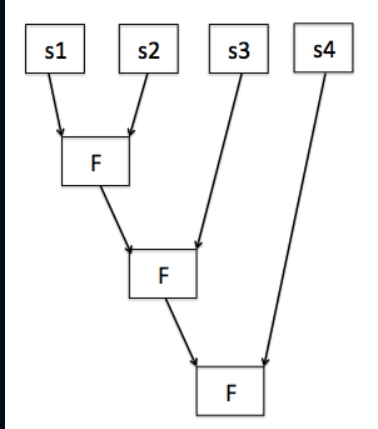

**En este caso reduce funcionaría igual que sum**

```python
from functools import reduce

lista = [1, 2, 3, 4, 5, 6]
reduce(lambda x, y: x + y, lista)
reduce(lambda x, y: x ** 2 + y, lista)

'''
21

'''
```

Reduce con inicializador:

```python
lista = [1, 2, 3, 4, 5]

reduce_sin_inicializador = reduce(lambda x, y: f'{x} {y}', lista)
reduce_con_inicializador = reduce(lambda x, y: f'{x} {y}', lista, '[Lista]')

print(f'Sin inicializador: {reduce_sin_inicializador}')
print(f'Con inicializador: {reduce_con_inicializador}')

'''
Sin inicializador: 1 2 3 4 5
Con inicializador: [Lista] 1 2 3 4 5
'''
```

### Ejemplos Reduce

Juntar una lista de listas.

```python
lista_con_listas = [[1, 2], [3, 4], [5, 6], [7, 8, 9]]
lista_aplanada = reduce(lambda x, y: x + y, lista_con_listas)
lista_aplanada

'''
[1, 2, 3, 4, 5, 6, 7, 8, 9]
'''
```

Interessicion o union de varios sets

```python
conjuntos = [{3, 5, 1}, {4, 3, 1}, {1, 2, 5}, {9, 5, 4, 1}]

unión = reduce(lambda x, y: x | y, conjuntos)
intersección = reduce(lambda x, y: x & y, conjuntos)

print("Unión:", unión)
print("Intersección:", intersección)

'''
Unión: {1, 2, 3, 4, 5, 9}
Intersección: {1}
'''
```

Calculo de minimo o máximos, en este caso sobre el mismo set obtenido anteriormente.

```python
reduce(lambda x, y: x if x > y else y, unión)  # Hecho así sólo como ejemplo pedagógico

# Output: 9
```

**Reduce es muy importante entender que siempre recibe solo 2 argumentos la funcion de reduce, luego puede recibir varios iterables**

### Precacuiones reduce

Si usamos un solo elemtnto, la operación retornará solo ese elemento sin aplicar la funcion.

```python 
reduce(lambda x, y: x + y, [1], 0)
# Output: 1
```

Esto potque el inicializador 0 no afectará a la suma.

Si la sentencia es vacía, salta error en reduce.

Si agregamos un inizializador correcorectamente.

### Operaciones no conmutativas.

Hay operaciones donde ele orden de la collección importa, como en la división $\frac{x}{y} \neq \frac{y}{x}$

```python	
def división(x, y):
    return x / y

números = [3, 5, 7, 9, 11]
reduce(división, números)

# Output: 0.0008658008658008659

reduce(división, números[::-1])

# Output: 0.01164021164021164
```

### Reducir sets u otros iterables no ordenados
```python
from random import shuffle
from typing import Self


class IteradorListaPalabrasDesordenadas:
    def __init__(self, iterable: list) -> None:
        self.iterable = iterable.copy()
    
    def __iter__(self) -> Self:
        shuffle(self.iterable)
        return self
    
    def __next__(self) -> str:
        if not self.iterable:
            raise StopIteration("Llegamos al final")
        else:
            valor = self.iterable.pop(0)
            return valor


palabras = IteradorListaPalabrasDesordenadas(['casa', 'mar', 'ventana', 'roca', 'piso'])
reduce(lambda x, y: f"{x} {y}", palabras)

'''
El resutlado depende
del orden que le haga shuffle al iterable
'''
```

## Funciones built-in

https://docs.python.org/3.7/library/functions.html la documentaciónnnn

### __len__

Se utiliza para que un objeto en particular entre el largo de este, la mayoria de **estructuras de datos** built-in viene con __len__, esto dado objeto.__len__()

Se puede hacer overriding de este metodo __len__.
Aqui podemos aplicar toda la logica que queramos.

```python 
class MiLista(list):
    """
    Tipo especial de lista, donde len(lista)
    retorna el largo sin considerar repetidos
    """
    def __len__(self) -> int:
        # Creamos un set con los datos que tenemos
        datos_sin_repetir = set(self)
        
        # Retornamos el largo de este set aprovechando que elimina los repetidos
        return len(datos_sin_repetir)
    
mi_lista = MiLista([1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 7, 2, 2, 3, 3, 1, 1])
print(len(mi_lista))
# Output: 7
```	

### __getitem__

Podemos acceder a estructuras de datos como diccionarios de la forma `objeto[valor]` o de forma secuencial con indice. Esto es lo que hace __getitem__.

Dos formas que funciona este metodo.

    De manera secuencial (lista)
    De manera *mapping* (diccionario)

```python
class MiString:
    def __init__(self, palabra: str) -> None:
        self.palabra = palabra
        
    def __getitem__(self, i: int) -> str:
        print(f"Pidiendo el elemento {i}:")
        return self.palabra[i]

mi_string = MiString("Hola-Mundo")
mi_string[0]
mi_string[15]

'''
Lanza el error IndexError
Si es que nos salimos del indice
'''
```

Al usar __getitem__ nuestro objeto se convierte en iterable.

AL usar un diccionario, deberia poder comportarse como tipo *mapping*. Si una llave es del tipo equivoxado debería lanzarse la excepción `TypeError`, mientras que si es del tipo correcto pero la llave no exioste, debería lanzarse la excepción `KeyError`.
```python
class ContadorLetras:
    def __init__(self, palabra: str) -> None:
        self.palabra = palabra
        
    def __getitem__(self, key: str) -> int:
        print(f"Pidiendo el elemento {key}:")
        # Notar que puedes decir levantar una excepción si la llave no está
        # if key not in self.palabra:
        #     raise KeyError("La letra no está en la palabra")
        return self.palabra.count(key)

contador_letras = ContadorLetras("Hola-Mundo")
contador_letras["o"]

'''
Pidiendo el elemento o:
2
'''
```

### __reversed__

TOma una secuencia cualquiera como input y retorna una **Copia de la secuencia** en **orden inverso**

Por naturalesa `__reversed__` utiliza getitem, y len iterando sobre este len veces usando getitem hacia atras.

podemos hacer un override especial, por ejemplo, se intercambia la primera mitad con la segunda, en vez de invertir el orden de elementos.

```python
lista = [1, 2, 3, 4, 5, 6]


class ListaReversaMitad(list):
    def __init__(self, *args) -> None:
        super().__init__(args)
        
    def __reversed__(self) -> list:
        mitad = len(self) // 2
        return self[mitad:] + self[:mitad]
    

for secuencia in lista, ListaReversaMitad(*lista):
    print(f"Clase {type(secuencia).__name__}: ", end="")

    for elemento in reversed(secuencia):
        print(elemento, end=", ")
    print()
```

En el ejemplo anterior, secuencia es un iterable, por lo que podemos usar reversed() para obtener una copia de la secuencia en orden inverso. En el caso de ListaReversaMitad, la secuencia se invierte, pero además se intercambia la primera mitad con la segunda.

### `enumerate`

`enumerate()`entrega una especie de generador que retorna tuplas, donde el primer objeto en cada tupla es el indice y el segundo es el item original. Por ejemplo si queremos iterar sobre una lista necesitamos obtener tanto el indice como su valor.

Esta se comporta con el tipo `enumerate` que se comporta de manera similar a un generador, por lo que se puede usar `next` para acceder a sus elementos. 

### `zip`







